# Loaded die: a simple tutorial in choosing priors

A die is loaded so that the expectation of values on its upper face is 4.5. What is the probability distribution?

Example use of the maximum entropy package: the unfair die example from Jaynes, *Probability Theory: The Logic of Science*, 2006.

Suppose you know that the long-run average number on the face of a 6-sided die
tossed many times is 4.5.

What probability $p(x)$ would you assign to rolling $x$ on the next roll?

<table>
<tr><th>x</th><th>1</th><th>2</th><th>3</th><th>4</th><th>5</th><th>6</th></tr>
<tr><td>p(x)</td><td>?</td><td>?</td><td>?</td><td>?</td><td>?</td><td>?</td></tr>
</table>

Constraints:

$$
\begin{align}
E(f_1(X)) = \sum_{x=1}^6 f_1(x) p(x) &= 4.5, \text{where } f_1(x) = x \\
\text{and} \\
\sum_{x=1}^6 p(x) &= 1
\end{align}
$$

This notebook shows how to use the scikit-maxentropy package to find the probability distribution with maximal information entropy subject to these constraints.

In [1]:
import numpy as np
from maxentropy.skmaxent import FeatureTransformer, MinDivergenceModel

In [2]:
samplespace = np.linspace(1, 6, 6)

In [3]:
def f_1(x):
    return x

In [4]:
features = [f_1]

In [5]:
k = np.array([4.5])
X = np.atleast_2d(k)

In [6]:
X

array([[ 4.5]])

In [7]:
model = MinDivergenceModel(features, samplespace)

In [8]:
len(features)

1

In [9]:
model.params

array([ 0.])

In [10]:
model.fit(X)

MinDivergenceModel(algorithm='CG', features=[<function f_1 at 0x117e4d378>],
          matrix_format='csr_matrix', prior_log_probs=None,
          samplespace=array([ 1.,  2.,  3.,  4.,  5.,  6.]),
          vectorized=True, verbose=0)

In [11]:
p = model.probdist()
p

array([ 0.05387955,  0.07828049,  0.11373212,  0.16523906,  0.24007245,
        0.34879633])

### Now try minimizing KL divergence from a constant prior. We should get the same model.

In [12]:
log_prior = np.log(np.ones(6)/6)

In [13]:
log_prior

array([-1.79175947, -1.79175947, -1.79175947, -1.79175947, -1.79175947,
       -1.79175947])

In [14]:
np.exp(log_prior).sum()

1.0000000000000002

In [15]:
from scipy.special import logsumexp
logsumexp(log_prior)

0.0

In [16]:
model2 = MinDivergenceModel(features, samplespace, prior_log_probs=log_prior)

In [17]:
model2.fit(X)

MinDivergenceModel(algorithm='CG', features=[<function f_1 at 0x117e4d378>],
          matrix_format='csr_matrix',
          prior_log_probs=array([-1.79176, -1.79176, -1.79176, -1.79176, -1.79176, -1.79176]),
          samplespace=array([ 1.,  2.,  3.,  4.,  5.,  6.]),
          vectorized=True, verbose=0)

In [18]:
p2 = model2.probdist()
p2

array([ 0.05387955,  0.07828049,  0.11373212,  0.16523906,  0.24007245,
        0.34879633])

In [19]:
np.allclose(p, p2)

True

In [20]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

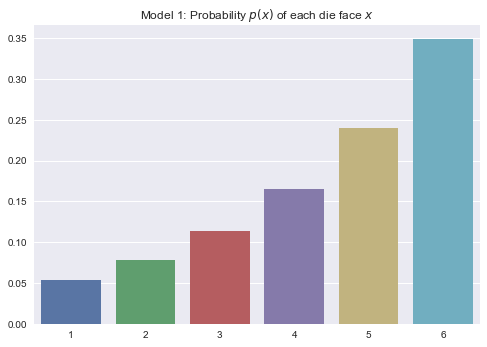

In [21]:
sns.barplot(np.arange(1, 7), model.probdist())
plt.title('Model 1: Probability $p(x)$ of each die face $x$')

### Now try a different prior: $p(1) = p(2) = p(3)=p(4)=p(5)=0.1$ and $p(6) = 0.5$

In [22]:
prior2 = np.zeros(6)

In [23]:
prior2[:4] = 0.1
prior2[4] = 0.5
prior2[5] = 0.1

In [24]:
prior2

array([ 0.1,  0.1,  0.1,  0.1,  0.5,  0.1])

In [25]:
prior2.sum()

1.0

In [26]:
prior_log_probs = np.log(prior2)

In [27]:
prior_log_probs

array([-2.30258509, -2.30258509, -2.30258509, -2.30258509, -0.69314718,
       -2.30258509])

In [28]:
model3 = MinDivergenceModel(features, samplespace, prior_log_probs, algorithm='BFGS', verbose=True)

Computing feature 0 of 1 ...


In [29]:
model3.samplespace

array([ 1.,  2.,  3.,  4.,  5.,  6.])

#### Before fitting the model, what do we have?

In [31]:
model3.probdist()

array([ 0.1,  0.1,  0.1,  0.1,  0.5,  0.1])

In [32]:
np.allclose(model.probdist(), model3.probdist())

False

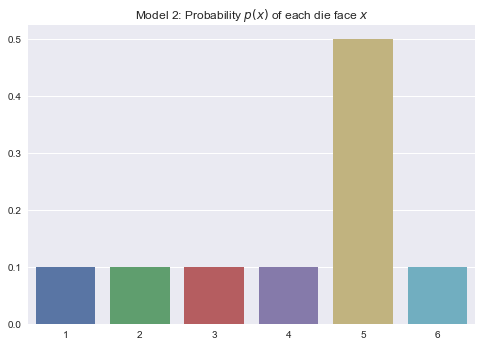

In [33]:
sns.barplot(np.arange(1, 7), model3.probdist())
plt.title('Model 2: Probability $p(x)$ of each die face $x$')

Are the constraints satisfied?

In [34]:
model3.expectations()

array([ 4.1])

No. (We haven't fitted the model yet.)

In [35]:
np.allclose(model3.expectations(), k)

False

#### What is the KL divergence before fitting the model ?

In [36]:
from scipy.stats import entropy

In [37]:
np.exp(2)

7.3890560989306504

In [38]:
np.exp(model3.prior_log_probs)

array([ 0.1,  0.1,  0.1,  0.1,  0.5,  0.1])

In [39]:
model3.probdist()

array([ 0.1,  0.1,  0.1,  0.1,  0.5,  0.1])

In [40]:
model3.divergence()

-3.3306690738754691e-16

Actually, this is zero, with numerical imprecision. The divergence is always >= 0 by definition.

In [41]:
np.allclose(model3.divergence(), 0)

True

#### Answer: zero

In [42]:
# Verify with scipy.stats.entropy():
D = entropy(model3.probdist(), np.exp(model3.prior_log_probs))
np.allclose(model3.divergence(), D)

True

### Now we fit the model (place constraints on it):

In [43]:
model3.fit(X)

Grad eval #0
  norm of gradient = 0.40000000000000124
Function eval # 0
  dual is  2.22044604925e-16
Function eval # 1
  dual is  -0.00892456719552
Grad eval #1
  norm of gradient = 0.279615776290429
Iteration # 0
Function eval # 2
  dual is  -0.00892456719552
Function eval # 3
  dual is  -0.0244182385215
Grad eval #2
  norm of gradient = 0.19942714532208683
Iteration # 1
Function eval # 4
  dual is  -0.0244182385215
Function eval # 5
  dual is  -0.037817149372
Grad eval #3
  norm of gradient = 0.03982231701241279
Iteration # 2
Function eval # 6
  dual is  -0.037817149372
Function eval # 7
  dual is  -0.0382709344129
Grad eval #4
  norm of gradient = 0.004744833359753287
Iteration # 3
Function eval # 8
  dual is  -0.0382709344129
Function eval # 9
  dual is  -0.038277669142
Grad eval #5
  norm of gradient = 9.479445384030782e-05
Iteration # 4
Function eval # 10
  dual is  -0.038277669142
Function eval # 11
  dual is  -0.0382776718225
Grad eval #6
  norm of gradient = 2.332165784935114e

MinDivergenceModel(algorithm='BFGS', features=[<function f_1 at 0x117e4d378>],
          matrix_format='csr_matrix',
          prior_log_probs=array([-2.30259, -2.30259, -2.30259, -2.30259, -0.69315, -2.30259]),
          samplespace=array([ 1.,  2.,  3.,  4.,  5.,  6.]),
          vectorized=True, verbose=True)

In [44]:
model3.probdist()

array([ 0.05125862,  0.06272495,  0.07675624,  0.09392627,  0.57468582,
        0.1406481 ])

In [45]:
np.exp(model3.prior_log_probs)

array([ 0.1,  0.1,  0.1,  0.1,  0.5,  0.1])

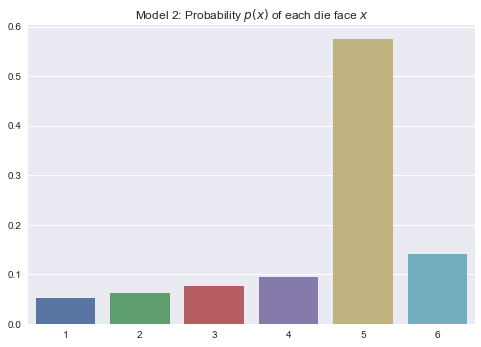

In [46]:
sns.barplot(np.arange(1, 7), model3.probdist())
plt.title('Model 2: Probability $p(x)$ of each die face $x$')